In [5]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
from langchain.schema import Document
from langchain.embeddings import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
embeddings = OpenAIEmbeddings(openai_api_key = api_key)

In [3]:
folder_path = 'Transcripts'
transcripts = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            text = file.read()
            transcripts.append(text)

Document(page_content=transcripts[0])

Document(page_content=" Hey everybody, Chuck here from Stuff You Should Know. No vacation destination captures the imagination more than the Caribbean, white sand beaches, clear blue waters, some call the Caribbean paradise. But sandals resort calls at home. Sandals provides an authentic taste of island life combined with a truly all inclusive experience. Everything's included, from exceptional cuisine and top shelf cocktails to scuba diving and championship golf. Plus, amazing accommodations and romantic sweets that are sanctuaries in themselves escape to the carefree world of the islands with sandals. To book your sandals vacation call 1-800 sandals or visit sandals.com backslashpodcast. Hey friends, I want to let you know something. At the end of your first year, discovered credit cards automatically will double all the cash back that you've earned. That's right, everything you earned doubled all the cash back from eating it your favorite soup dumpling restaurant doubled all that ca

In [17]:
comparison_indexes = []

for i in range(len(transcripts)):
    for j in range(len(transcripts)):
        if i > j:
            comparison_indexes.append((i,j))

print(comparison_indexes)
print(len(comparison_indexes))

[(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (4, 3), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
21


In [18]:
sysk_embedding = embeddings.embed_documents(transcripts, chunk_size= 100)
print(len(sysk_embedding))

7


In [19]:
for i in comparison_indexes:
    x, y = i 
    vec1 = np.array(sysk_embedding[x]).reshape(1, -1)
    vec2 = np.array(sysk_embedding[y]).reshape(1, -1)

    cos_sim = cosine_similarity(vec1,vec2)
    print(f'Cosine Similarity between {x} and {y}: {cos_sim}')

Cosine Similarity between 1 and 0: [[0.90114738]]
Cosine Similarity between 2 and 0: [[0.88736178]]
Cosine Similarity between 2 and 1: [[0.92335027]]
Cosine Similarity between 3 and 0: [[0.89273079]]
Cosine Similarity between 3 and 1: [[0.94671137]]
Cosine Similarity between 3 and 2: [[0.92313898]]
Cosine Similarity between 4 and 0: [[0.8755203]]
Cosine Similarity between 4 and 1: [[0.90368939]]
Cosine Similarity between 4 and 2: [[0.90697098]]
Cosine Similarity between 4 and 3: [[0.90489545]]
Cosine Similarity between 5 and 0: [[0.89611422]]
Cosine Similarity between 5 and 1: [[0.95217537]]
Cosine Similarity between 5 and 2: [[0.92000031]]
Cosine Similarity between 5 and 3: [[0.95210741]]
Cosine Similarity between 5 and 4: [[0.90623185]]
Cosine Similarity between 6 and 0: [[0.91277662]]
Cosine Similarity between 6 and 1: [[0.8802022]]
Cosine Similarity between 6 and 2: [[0.88609086]]
Cosine Similarity between 6 and 3: [[0.87700311]]
Cosine Similarity between 6 and 4: [[0.89438646]]
Co

In [20]:
edge_weight_similarities = []

for i in comparison_indexes:
    x, y = i 
    vec1 = np.array(sysk_embedding[x])
    vec2 = np.array(sysk_embedding[y])

    euc_distance = np.linalg.norm(vec1 - vec2)

    edge_weight_similarities.append((x,y,euc_distance))
    print(f'Euclidian distance between {x} and {y}: {round(euc_distance, 3)}')

Euclidian distance between 1 and 0: 0.445
Euclidian distance between 2 and 0: 0.475
Euclidian distance between 2 and 1: 0.392
Euclidian distance between 3 and 0: 0.463
Euclidian distance between 3 and 1: 0.326
Euclidian distance between 3 and 2: 0.392
Euclidian distance between 4 and 0: 0.499
Euclidian distance between 4 and 1: 0.439
Euclidian distance between 4 and 2: 0.431
Euclidian distance between 4 and 3: 0.436
Euclidian distance between 5 and 0: 0.456
Euclidian distance between 5 and 1: 0.309
Euclidian distance between 5 and 2: 0.4
Euclidian distance between 5 and 3: 0.309
Euclidian distance between 5 and 4: 0.433
Euclidian distance between 6 and 0: 0.418
Euclidian distance between 6 and 1: 0.489
Euclidian distance between 6 and 2: 0.477
Euclidian distance between 6 and 3: 0.496
Euclidian distance between 6 and 4: 0.46
Euclidian distance between 6 and 5: 0.481


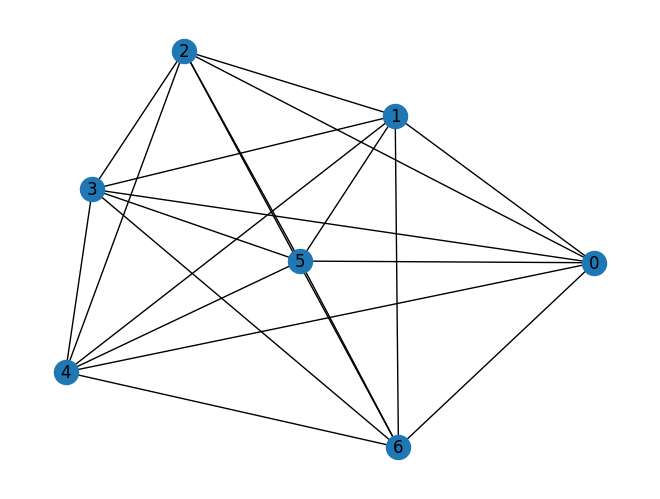

In [21]:
points = list(range(len(transcripts)))
distances = edge_weight_similarities
labels = {i: f'{i}' for i in points}

G = nx.Graph()
G.add_nodes_from(points)
G.add_weighted_edges_from(distances)

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels)

plt.show()